# Introductory Analysis

The integration of technology, such as mobile apps and smart docking stations, has enhanced the user experience and made bike sharing more convenient and accessible. Users can easily locate available bikes, unlock them using their smartphones, and track their ride statistics in real-time. 
Also, the perks of riding a bike include better cardiovascular health, strong muscles, and calories burning. As a result, many individuals choose bike sharing as a way to incorporate physical activity into their daily routines while commuting to work or running errands. That's why this industry has significantly grown lately and some bike rental companies are starting to use data analytics and machine learning tools to predict their business growth considering multiple factors in order to optimize their operations and gain a strong position in the market.

# Data Input

In [1]:
## importing libraries ##

# for this template
import numpy             as np                         # mathematical essentials
import pandas            as pd                         # data science essentials
import sklearn.linear_model                            # linear models
from sklearn.model_selection import train_test_split   # train/test split
from sklearn.linear_model import LinearRegression      # Linear Regressions
from sklearn.metrics import mean_squared_error         # mean squared error 
from sklearn.preprocessing import StandardScaler       # Standard Scaler
import warnings                                        # warnings from code
from sklearn.tree import DecisionTreeRegressor         # regression trees
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.neighbors import KNeighborsRegressor      # KNN
import matplotlib.pyplot as plt                        # visualizations


# suppressing warnings
warnings.filterwarnings(action = 'ignore')

#!###############################!#
#!# import additional libraries #!#
#!###############################!#
# import whatever you need


# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Importing training data
modeling_data = 'C:\\Users\\ihida\\Documents\\HULT\\Computational Data Analytics with Python\\A1 Kaggle\\train.xlsx'

# Naming this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')

# Importing testing data
testing_data = 'C:\\Users\\ihida\\Documents\\HULT\\Computational Data Analytics with Python\\A1 Kaggle\\test.xlsx'

# Naming this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')

In [3]:
# Concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# Concatenating both datasets together for mv and feature engineering
df_both = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)

# Checking data
df_both.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle


In [4]:
# Checking available features
df_both.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

# Exploratory Data Analysis and Data Preprocessing

The thorough analysis of descriptive statistics and skewness in the data is insightful and provides a solid foundation for understanding the distribution of variables and how it impacts on bike rentals. Recognizing the normal distribution of temperature and humidity, as well as the right-skew of rainfall and snowfall, is indeed crucial for making informed decisions during data preprocessing.

The training dataset contains information about weather conditions like temperature, humidity %, wind speed, among other variables that can set up the scenario for renting a bike. As initial analysis is conducted, it is notorious that some fields show missing values like visibility, dew point temperature and solar radiation, so they will be carefully handled with appropriate imputation techniques. On the other hand, there are two categorical fields such as holiday and functioning day that will be transformed into integer columns to facilitate the analysis. 

Regarding the correlation coefficients of the feature variables with the target variable Rentals, these are some insights derived from the exploratory phase:

* Temperature: The positive correlation (0.32) suggests warmer temperatures are associated with more bike rentals. This aligns with the idea that people are more likely to choose cycling in comfortable, pleasant weather.

* Solar Radiation: The positive correlation (0.21) indicates sunnier days tend to see higher rental numbers. This makes sense as sunshine is generally perceived as enjoyable weather, making cycling more appealing.

* Wind Speed: The weak positive correlation (0.19) implies that wind speed has a minimal impact on rentals within the observed range. It's possible that stronger winds (beyond the data range) might discourage cycling, but slight breezes seem negligible.

* Humidity: The negative correlation (-0.39) suggests higher humidity is linked to fewer bike rentals. This could be because high humidity can be uncomfortable for cycling, especially during physical exertion.

In [5]:
df_both.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2184 entries, mb_1039 to mb_1225
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateHour                2184 non-null   object 
 1   Temperature(F)          2184 non-null   int64  
 2   Humidity(%)             2184 non-null   int64  
 3   Wind speed (mph)        2184 non-null   float64
 4   Visibility(miles)       2108 non-null   float64
 5   DewPointTemperature(F)  2117 non-null   float64
 6   Rainfall(in)            2184 non-null   float64
 7   Snowfall(in)            2184 non-null   float64
 8   SolarRadiation(MJ/m2)   2078 non-null   float64
 9   Holiday                 2184 non-null   object 
 10  FunctioningDay          2184 non-null   object 
 11  RENTALS                 1638 non-null   float64
 12  set                     2184 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 238.9+ KB


In [6]:
# Summary statistics for the full dataset
summary_statistics = df_both.describe(include='all')
print(summary_statistics)

                          DateHour  Temperature(F)  Humidity(%)  Wind speed (mph)  Visibility(miles)  DewPointTemperature(F)  Rainfall(in)  Snowfall(in)  SolarRadiation(MJ/m2) Holiday FunctioningDay      RENTALS         set
count                         2184     2184.000000  2184.000000       2184.000000        2108.000000             2117.000000   2184.000000   2184.000000            2078.000000    2184           2184  1638.000000        2184
unique                        2184             NaN          NaN               NaN                NaN                     NaN           NaN           NaN                    NaN       2              2          NaN           2
top     2023-10-14 05:59:54.810000             NaN          NaN               NaN                NaN                     NaN           NaN           NaN                    NaN      No            Yes          NaN  Not Kaggle
freq                             1             NaN          NaN               NaN                NaN    

In [7]:
# Checking for missing values in the full dataset
missing_values = df_both.isnull().sum()
print(missing_values)

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)          76
DewPointTemperature(F)     67
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)     106
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64


In [8]:
# Select only numeric columns for correlation analysis
numeric_df_train = df_train.select_dtypes(include=[np.number])

# Calculate the correlation matrix on numeric columns only
correlation_matrix_numeric = numeric_df_train.corr()

# Display the correlation with the target variable 'RENTALS'
print(correlation_matrix_numeric['RENTALS'].sort_values(ascending=False))

RENTALS                   1.000000
Temperature(F)            0.322811
SolarRadiation(MJ/m2)     0.207526
Wind speed (mph)          0.186261
DewPointTemperature(F)    0.030903
Visibility(miles)         0.004390
Snowfall(in)             -0.086884
Rainfall(in)             -0.145802
Humidity(%)              -0.395309
Name: RENTALS, dtype: float64


In [9]:
# For categorical variables 'Holiday' and 'FunctioningDay', check their distribution
print(df_both['Holiday'].value_counts())
print(df_both['FunctioningDay'].value_counts())

Holiday
No     2064
Yes     120
Name: count, dtype: int64
FunctioningDay
Yes    1937
No      247
Name: count, dtype: int64


In [10]:
# Potential impact on the target can be explored through groupby if the target variable is in the dataset
if 'RENTALS' in df_train.columns:
    print(df_train.groupby('Holiday')['RENTALS'].mean())
    print(df_train.groupby('FunctioningDay')['RENTALS'].mean())

Holiday
No     832.040593
Yes    758.011628
Name: RENTALS, dtype: float64
FunctioningDay
No       0.000000
Yes    932.313402
Name: RENTALS, dtype: float64


       Temperature(F)  Humidity(%)  Wind speed (mph)  Visibility(miles)  DewPointTemperature(F)  Rainfall(in)  Snowfall(in)  SolarRadiation(MJ/m2)      RENTALS
count     2184.000000  2184.000000       2184.000000        2108.000000             2117.000000   2184.000000   2184.000000            2078.000000  1638.000000
mean        57.389652    59.228480          3.344780           9.646964               42.036089      0.004858      0.002015               0.547161   828.153846
std         12.861669    18.686445          2.071144           3.492413               13.997667      0.037354      0.018550               0.810564   657.599846
min         26.000000    13.000000          0.000000           0.000000               -2.200000      0.000000      0.000000               0.000000     0.000000
25%         48.000000    44.000000          1.800000           7.400000               33.400000      0.000000      0.000000               0.000000   241.500000
50%         57.000000    59.000000      

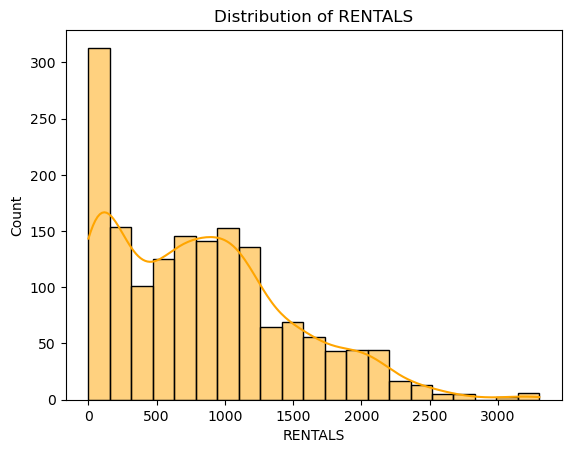

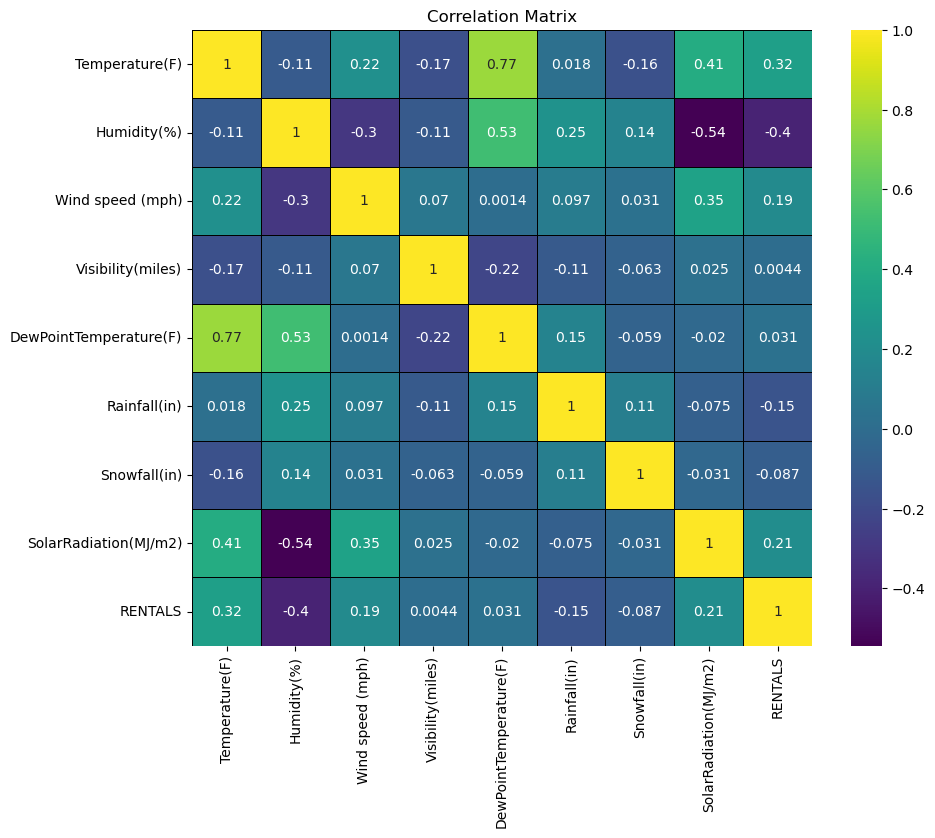

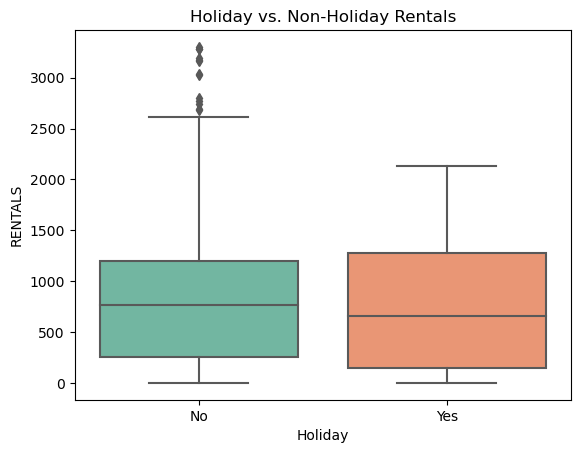

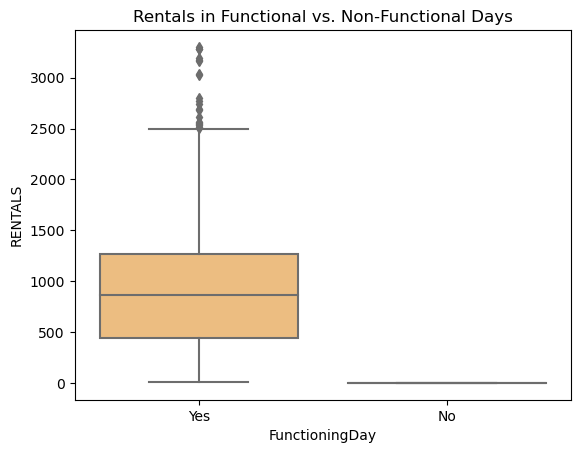

In [11]:
# Statistical summary of df_both
print(df_both.describe())

# Count of missing values per column in df_both
print(df_both.isnull().sum())

# Filter by 'Not Kaggle' training set to display 'RENTALS'
sns.histplot(df_both[df_both['set'] == 'Not Kaggle']['RENTALS'], kde=True, color='orange')
plt.title('Distribution of RENTALS')
plt.show()

# Filter df_both for analysis on the training set
train_data_for_corr = df_both[df_both['set'] == 'Not Kaggle'].select_dtypes(include=[np.number])

# Correlation Matrix
correlation_matrix = train_data_for_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linecolor  = 'black', linewidths = 0.4)
plt.title('Correlation Matrix')
plt.show()

# Boxplot for 'Holiday
sns.boxplot(x='Holiday', y='RENTALS', data=df_both[df_both['set'] == 'Not Kaggle'], palette="Set2")
plt.title('Holiday vs. Non-Holiday Rentals')
plt.show()

# Boxplot for 'FunctioningDay'
sns.boxplot(x='FunctioningDay', y='RENTALS', data=df_both[df_both['set'] == 'Not Kaggle'], palette="Spectral")
plt.title('Rentals in Functional vs. Non-Functional Days')
plt.show()

#### Analysis of the Distribution of Rentals Histogram

The bulk of the data clustering towards the left of the distribution means most days see a moderate, predictable number of bike rentals. On the other hand, the long tail extending to the right shows that there are occasional days with extraordinarily high demand. These high-demand days are likely driven by the factors discussed earlier (great weather, special events, etc.).

Since high-demand days are less common, the service needs strategies to accommodate them. This could involve:
* Surge capacity staffing: Having standby staff ready for peak days
* Dynamic pricing: Potentially raising prices during peak times to manage demand
* Bike redistribution: Ensuring bikes are available in high-demand areas

#### Analysis of the Correlation Matrix Heatmap

The positive correlation with solar radiation suggests that people are more likely to rent bikes on brighter, sunnier days. This aligns with the simple idea that desirable weather makes outdoor activities more appealing. Also, this can inform marketing strategies for the bike rental service. Emphasizing availability on sunny days, or partnering with outdoor events could be beneficial.

With respect to the temperature and dew point, the strong positive correlation means that as temperature rises, so does dew point. This makes sense, as warmer air can hold more moisture before becoming saturated. High dew points lead to that oppressive "sticky" feeling, which can discourage outdoor recreation like cycling.

These correlations, taken in tandem, provide valuable information for the bike rental service like optimal conditions (targeting marketing and promotions during days with warm temperatures, sunshine, and low humidity), adaptability (preparing for lower demand on high-humidity days, potentially by adjusting staffing levels or offering alternative indoor activities) and customer experience (emphasizing the enjoyment of cycling in comfortable, pleasant weather conditions).

#### Analysis of the Holiday vs. Non-Holiday Rentals Boxplot

The slightly lower median, combined with the absence of extreme outliers on holidays, suggests a more predictable demand pattern. This contrasts with regular weekdays where greater variability and higher peaks in usage likely occur. Also, the similar spread of rentals on both holidays and non-holidays highlights a steady base-level demand for the service, even when regular commuting might be less frequent.

Understanding the subtle shift towards recreational usership on holidays can guide specific strategies:

* Promotional Partnerships: Collaborating with tourism bodies or attractions more popular during holidays
* Route Suggestions: Highlighting scenic routes for leisure rides

#### Analysis of the Rentals in Functional vs. Non-Functional Days Boxplot

The broader interquartile (IQR) range on functioning days signifies greater variability in rental numbers. This suggests that the demand fluctuates more significantly when the service is available. This variability could be due to: weather conditions, special events (large gatherings, festivals, or road closures might lead to unexpected spikes in demand on specific days) or commuting patterns (weekday rush hour commutes could contribute to higher demand compared to weekends or non-peak hours).

The higher median on functioning days indicates a generally higher level of ridership when the service is operational. This underscores the necessity and importance of the bike rental system in meeting everyday transportation needs for many users. Finally, the existence of outliers on functioning days suggests occasional instances of exceptionally high demand.

# Data Modeling

In [12]:
# Feature Engineering

# Ensure datetime parsing handles mixed formats
df_both['DateHour'] = pd.to_datetime(df_both['DateHour'], errors='coerce', format='mixed', dayfirst=True)

# After parsing, you can proceed with extracting date and time components
df_both['Hour'] = df_both['DateHour'].dt.hour
df_both['DayOfWeek'] = df_both['DateHour'].dt.dayofweek
df_both['Month'] = df_both['DateHour'].dt.month

# One hot encoding for 'Holiday' and 'FunctioningDay' using pandas to get_dummies for simplicity
df_both = pd.get_dummies(df_both, columns=['Holiday', 'FunctioningDay'], drop_first=True)

# Dropping the 'DateHour' column if it's no longer needed, or if there were parsing issues
df_both.drop(['DateHour'], axis=1, inplace=True)

# Check for any NaT values that indicate unsuccessful parsing
print(df_both[df_both['Hour'].isna()])

Empty DataFrame
Columns: [Temperature(F), Humidity(%), Wind speed (mph), Visibility(miles), DewPointTemperature(F), Rainfall(in), Snowfall(in), SolarRadiation(MJ/m2), RENTALS, set, Hour, DayOfWeek, Month, Holiday_Yes, FunctioningDay_Yes]
Index: []


#### Feature Engineering

Machine learning models typically require numerical features for processing. String data like dates and times need to be converted into a format the model can understand. Datetime format allows the model to work with the date and time components individually, enabling tasks like:

* Identifying temporal trends: Analyzing how rental patterns change over time (e.g., daily, hourly)
* Creating time-based features: Extracting new features like day of the week, month, or season to improve model performance

Datetime conversion opens doors to feature engineering, where we can create new features based on the existing datetime information. These features can be valuable for the model, such as:

* Time of day: Categorizing rentals into peak hours, off-peak hours, etc
* Day of the week: Distinguish between weekday and weekend rentals
* Seasonality: Capture seasonal patterns in rental trends

Last but not least, the errors='coerce' argument is a good practice when converting dates. It ensures that any invalid date strings are not causing errors and are instead converted to a special marker value (usually NaT). This helps to prevent the entire conversion process from failing due to a few problematic entries.

In [13]:
# Separating Kaggle data
kaggle_data = df_both[df_both['set'] == 'Kaggle'].copy()
df = df_both[df_both['set'] == 'Not Kaggle'].copy()

# Removing 'set' column
kaggle_data.drop(['set'], axis=1, inplace=True)
df.drop(['set'], axis=1, inplace=True)

In [14]:
# Separating features (X) and target variable (y) for the training data
X = df.drop('RENTALS', axis=1)
y = df['RENTALS']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# RENTALS' is the target variable
y_variable = 'RENTALS'

# Features chosen based on numeric data types and relevance to the objective
x_features = ['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 
              'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 
              'Hour', 'DayOfWeek', 'Month', 'Holiday_Yes', 'FunctioningDay_Yes']

# Imputing missing values to the selected features
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df[x_features]), columns=x_features)

# Standardizing the characteristics after imputation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)

# Separating the characteristics (X) and the target variable (y) after cleaning and standardization
y = df[y_variable]

# Dividing the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Printing train-test split results
# Printing the train-test split results
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df_imputed.shape[0]}
Features (Columns): {len(x_features)}

Training Data (X-side)
----------------------
Observations (Rows): {X_train.shape[0]}
Features (Columns): {X_train.shape[1]}

Training Data (y-side)
----------------------
Observations (Rows): {y_train.shape[0]}

Testing Data (X-side)
---------------------
Observations (Rows): {X_test.shape[0]}
Features (Columns): {X_test.shape[1]}

Testing Data (y-side)
---------------------
Observations (Rows): {y_test.shape[0]}
""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1638
Features (Columns): 13

Training Data (X-side)
----------------------
Observations (Rows): 1228
Features (Columns): 13

Training Data (y-side)
----------------------
Observations (Rows): 1228

Testing Data (X-side)
---------------------
Observations (Rows): 410
Features (Columns): 13

Testing Data (y-side)
---------------------
Observations (Rows): 410



In [16]:
# Define the function to train and evaluate each model
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    gap = abs(train_score - test_score)
    
    print(f"{model_name} Train Score: {train_score:.4f}")
    print(f"{model_name} Test Score: {test_score:.4f}")
    print(f"{model_name} Train-Test Gap: {gap:.4f}\n")
    
    return {
        "model_name": model_name,
        "train_score": train_score,
        "test_score": test_score,
        "gap": gap,
        "model": model
    }

OLS Linear Regression Train Score: 0.5576
OLS Linear Regression Test Score: 0.5545
OLS Linear Regression Train-Test Gap: 0.0031

Lasso Regression Train Score: 0.5576
Lasso Regression Test Score: 0.5549
Lasso Regression Train-Test Gap: 0.0027

Ridge Regression Train Score: 0.5576
Ridge Regression Test Score: 0.5545
Ridge Regression Train-Test Gap: 0.0031

Elastic Net Regression Train Score: 0.5573
Elastic Net Regression Test Score: 0.5548
Elastic Net Regression Train-Test Gap: 0.0025

K-Nearest Neighbors Train Score: 0.7910
K-Nearest Neighbors Test Score: 0.6423
K-Nearest Neighbors Train-Test Gap: 0.1487

Decision Tree Regressor Train Score: 1.0000
Decision Tree Regressor Test Score: 0.6524
Decision Tree Regressor Train-Test Gap: 0.3476


Coefficients for OLS Linear Regression:
                        Coefficient
Temperature(F)           203.957456
Humidity(%)             -216.158342
Wind speed (mph)           5.689319
Visibility(miles)         -8.684732
DewPointTemperature(F)     0.580

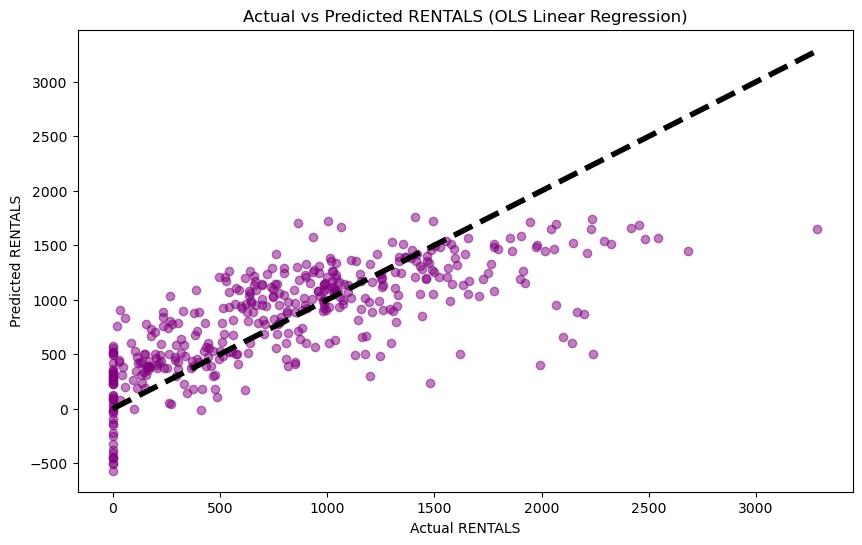

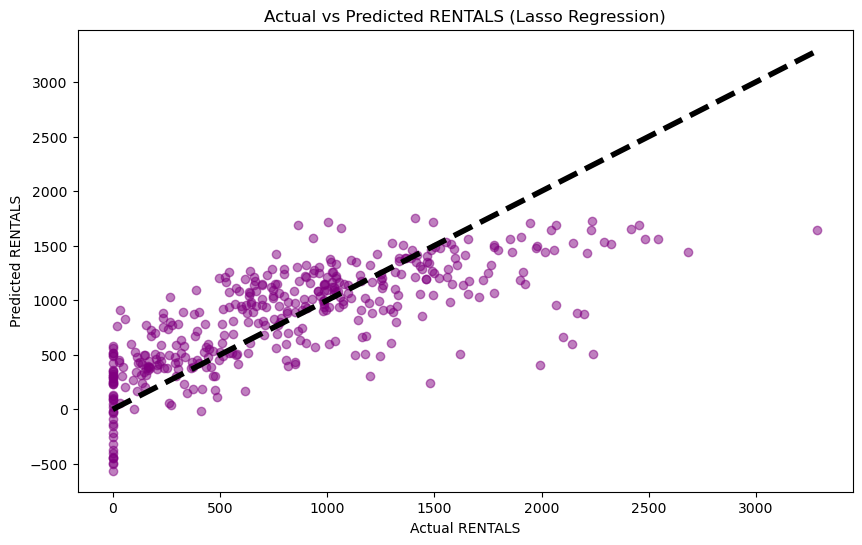

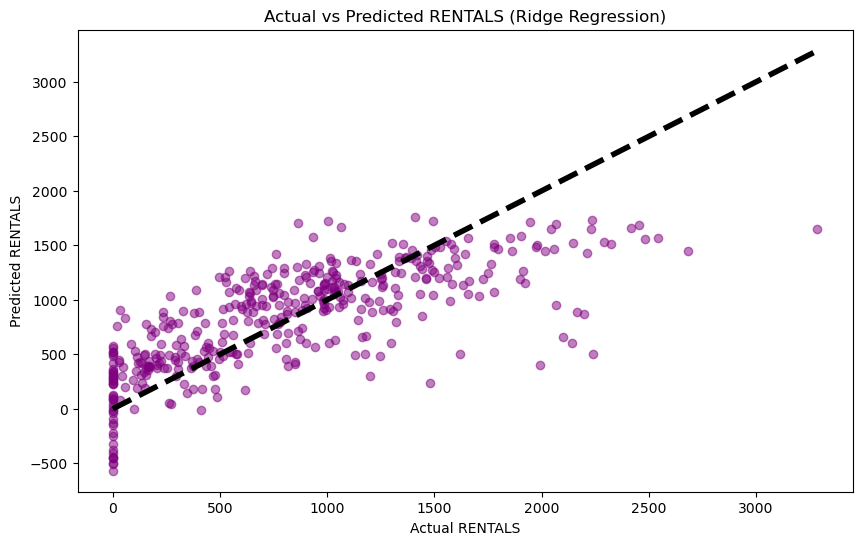

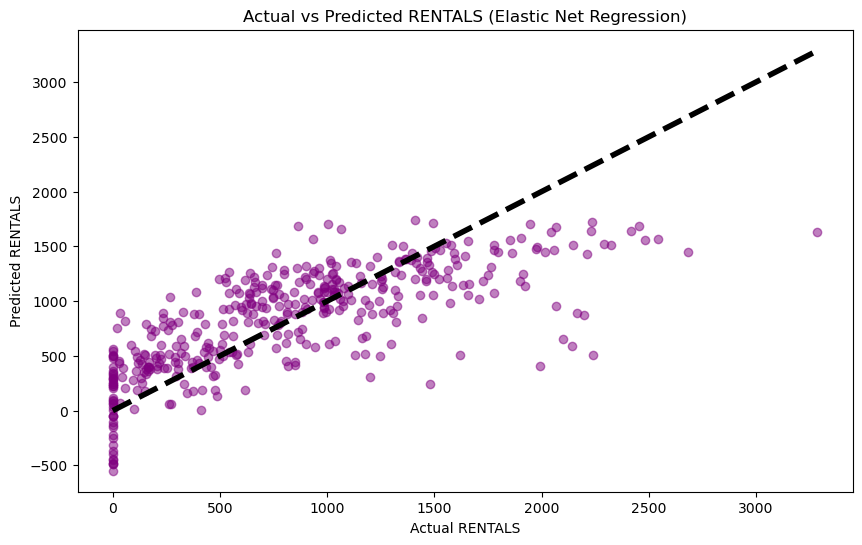

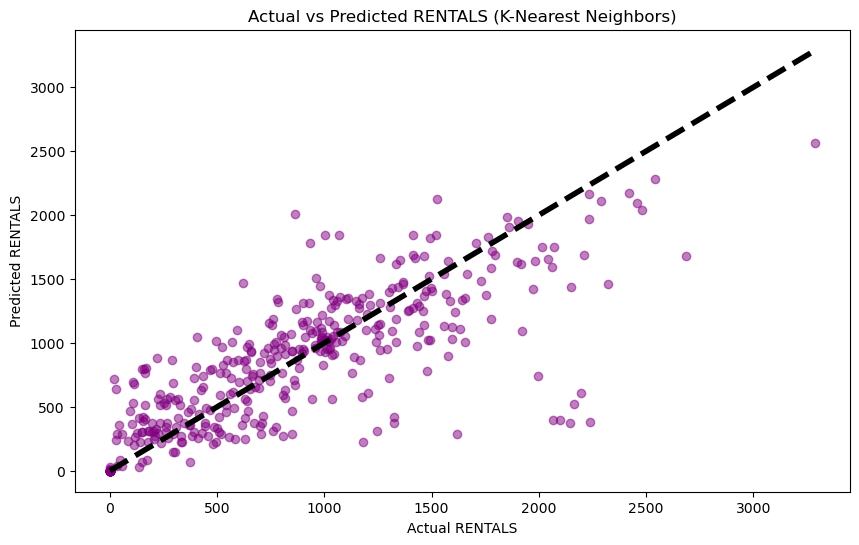

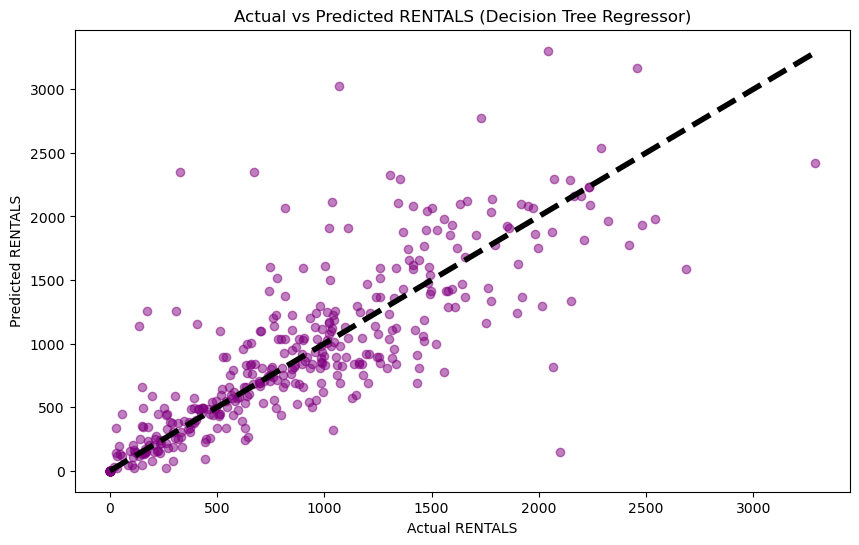

In [17]:
# Candidate Model Development

# Initializing models
models = {
    "OLS Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(random_state=42),
    "Ridge Regression": Ridge(random_state=42),
    "Elastic Net Regression": SGDRegressor(max_iter=1000, tol=1e-3, penalty="elasticnet", random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42)
}

# Evaluating models
results = {}
for model_name, model in models.items():
    results[model_name] = train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test)

# Displaying coefficients or characteristic importance
for model_name, result in results.items():
    model = result["model"]
    if hasattr(model, "coef_"):
        print(f"\nCoefficients for {model_name}:")
        coefficients = pd.DataFrame(model.coef_, index=x_features, columns=['Coefficient'])
        print(coefficients)
    elif hasattr(model, "feature_importances_"):
        print(f"\nFeature Importances for {model_name}:")
        feature_importances = pd.DataFrame(model.feature_importances_, index=x_features, columns=['Importance'])
        print(feature_importances)

# Generating and displaying scatter plots for actual vs predicted rentals for each model
for model_name, result in results.items():
    model = result["model"]
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
    plt.xlabel("Actual RENTALS")
    plt.ylabel("Predicted RENTALS")
    plt.title(f"Actual vs Predicted RENTALS ({model_name})")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.show()

## Candidate Model Development

#### OLS Linear Regression

The close fit to the line of identity with similar train and test scores suggests a well-fitting model. However, it's crucial to remember that OLS doesn't account for multicollinearity and might be susceptible to overfitting in some scenarios.

#### Lasso Regression

Lasso applies a penalty, but it can shrink coefficients to zero, effectively performing feature selection. The close train-test scores indicate successful identification of an underlying pattern without overfitting.

#### Ridge Regression

The performance suggests Ridge Regression is effective in handling multicollinearity among features. The regularization term penalizes large coefficients, preventing any single feature from dominating the model, leading to a more robust model.

#### Elastic Net Regression

The balanced fit is likely due to its combination of L1 and L2 regularization.

* L1 regularization: Enforces sparsity by driving some coefficients to zero, effectively performing feature selection
* L2 regularization: Shrinks coefficients towards zero, reducing variance and preventing overfitting

This combination helps address multicollinearity (correlated features) and model complexity, leading to better generalization.

#### K-Nearest Neighbors (KNN)

The alignment with the line of identity for lower values and the spread for higher values indicate KNN struggles to capture the patterns leading to higher rental counts. This could be due to:

* Choice of 'k': The number of neighbors considered (k) might be too low or too high, impacting accuracy
* Distance Metric: The way KNN measures distance between data points might not be suitable for this specific data
* Feature Scaling: If features have different scales, it can affect the distance calculations and model performance. Scaling features might improve KNN's accuracy

#### Decision Tree Regression

The model's dispersion from the line of identity and perfect training score strongly suggest overfitting. This means the model memorized the training data too well and might not generalize well to unseen data.

In [18]:
# Hyperparameter Tuning

def perform_grid_search(model, params, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    gap = abs(train_score - test_score)
    
    print(f"Best parameters for {type(model).__name__}: {grid_search.best_params_}")
    print(f"{type(model).__name__} Train Score: {train_score:.4f}")
    print(f"{type(model).__name__} Test Score: {test_score:.4f}")
    print(f"{type(model).__name__} Train RMSE: {train_rmse:.4f}")
    print(f"{type(model).__name__} Test RMSE: {test_rmse:.4f}")
    print(f"{type(model).__name__} Train-Test Gap: {gap:.4f}\n")
    
    return grid_search, best_model

# Lasso
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
best_lasso = perform_grid_search(Lasso(random_state=42), lasso_params, X_train, y_train, X_test, y_test)

# Ridge
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
best_ridge = perform_grid_search(Ridge(random_state=42), ridge_params, X_train, y_train, X_test, y_test)

# ElasticNet
elastic_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.15, 0.25, 0.5, 0.75]}
best_elastic = perform_grid_search(SGDRegressor(penalty='elasticnet', max_iter=1000, tol=1e-3, random_state=42),
                                   elastic_params, X_train, y_train, X_test, y_test)

# KNN
knn_params = {'n_neighbors': [3, 5, 7, 10, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
best_knn = perform_grid_search(KNeighborsRegressor(), knn_params, X_train, y_train, X_test, y_test)

# Decision Tree
tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10, 20]
}
grid_search_tree, best_tree_model = perform_grid_search(DecisionTreeRegressor(random_state=42), tree_params, X_train, y_train, X_test, y_test)

Best parameters for Lasso: {'alpha': 1}
Lasso Train Score: 0.5576
Lasso Test Score: 0.5549
Lasso Train RMSE: 443.2863
Lasso Test RMSE: 420.0092
Lasso Train-Test Gap: 0.0027

Best parameters for Ridge: {'alpha': 10}
Ridge Train Score: 0.5576
Ridge Test Score: 0.5549
Ridge Train RMSE: 443.2916
Ridge Test RMSE: 419.9819
Ridge Train-Test Gap: 0.0026

Best parameters for SGDRegressor: {'alpha': 0.001, 'l1_ratio': 0.15}
SGDRegressor Train Score: 0.5573
SGDRegressor Test Score: 0.5548
SGDRegressor Train RMSE: 443.4300
SGDRegressor Test RMSE: 420.0504
SGDRegressor Train-Test Gap: 0.0025

Best parameters for KNeighborsRegressor: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNeighborsRegressor Train Score: 1.0000
KNeighborsRegressor Test Score: 0.7021
KNeighborsRegressor Train RMSE: 0.0000
KNeighborsRegressor Test RMSE: 343.6035
KNeighborsRegressor Train-Test Gap: 0.2979

Best parameters for DecisionTreeRegressor: {'max_depth': None, 'max_features': None, 'max_leaf_nodes': No

## Final Model Decision

After tuning the hyperparameters, using a Decision Tree Regression with an acceptable gap between the training and testing scores indicates that the model has learned the data patterns well without overfitting to the training data. This suggests that the model can generalize effectively to new, unseen data, which is crucial for making accurate predictions in real-world scenarios.

The interpretability of the Decision Tree model also makes it an attractive choice, as it allows users to understand how the model arrives at its predictions, making it easier to interpret and explain to stakeholders.

Overall, the Decision Tree Regressor provides a good balance between accuracy on the training data and generalization to unseen data, making it a suitable choice for predicting bike rentals based on the provided features.

In [19]:
# Using the best model of the hyperparameter setting
best_tree_model = grid_search_tree.best_estimator_

# Making predictions on the test data set
test_predictions = best_tree_model.predict(X_test)

train_score = best_tree_model.score(X_train, y_train)
test_score = best_tree_model.score(X_test, y_test)
gap = abs(train_score - test_score)
print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")
print(f"Train-Test Gap: {gap:.4f}")

Train Score: 0.8708
Test Score: 0.7464
Train-Test Gap: 0.1244


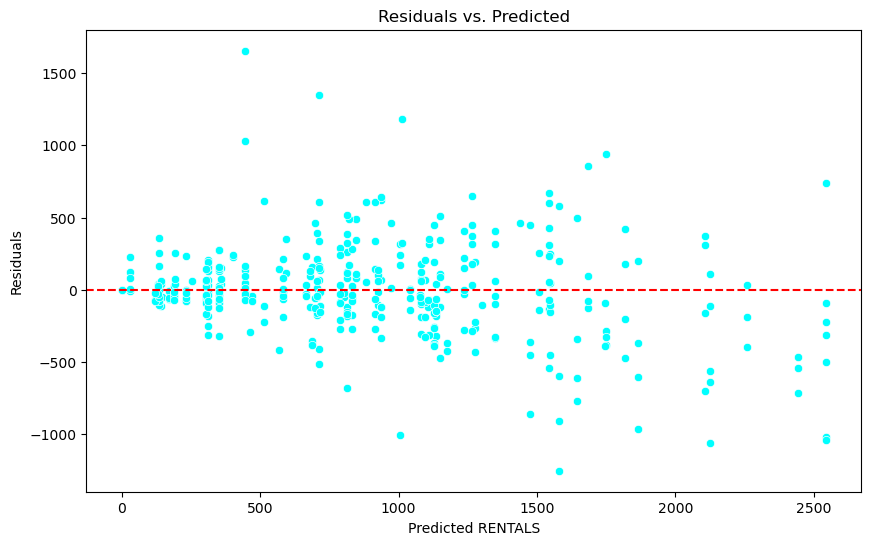

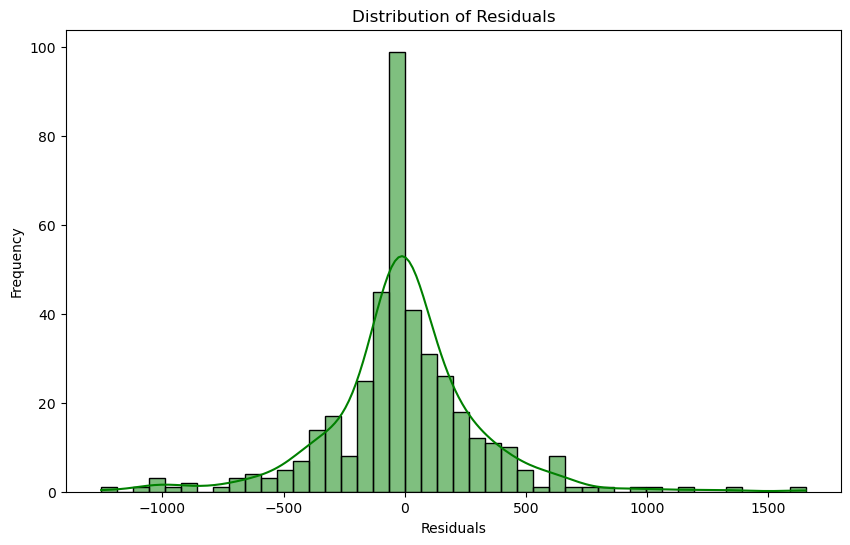

In [22]:
# Residual Analysis

# Calculate the residuals
residuals = y_test - test_predictions

# Organize the residuals in a DataFrame
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions, 'Residuals': residuals})

# Residuals chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted', y='Residuals', data=residuals_df, color='cyan')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted RENTALS')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [23]:
# Using the best parameters obtained from the hyperparameter fit
decision_tree_best = DecisionTreeRegressor(**grid_search_tree.best_params_, random_state=42)
decision_tree_best.fit(X_train, y_train)

# Prepare Kaggle feature data for prediction
X_kaggle_scaled = scaler.transform(kaggle_data[x_features]) 

# Generate predictions for the Kaggle dataset
kaggle_predictions = decision_tree_best.predict(X_kaggle_scaled)

# Organizing predictions for Kaggle's presentation
kaggle_submission = pd.DataFrame({
    "RENTALS": kaggle_predictions
}, index=kaggle_data.index)

# Save the Kaggle file to be submitted
kaggle_submission_filename = "decision_tree_submission.csv"
kaggle_submission.to_csv(kaggle_submission_filename, index=True, index_label='ID')

print(f"Kaggle's shipping file saved as: {kaggle_submission_filename}")

Kaggle's shipping file saved as: decision_tree_submission.csv


<br>

<br>

<br>